# 模型比较

三张比较的图

1. AS + [RF | Proteomics | PRS]
2. RF + Proteomics vs RF + PRS 
3. AS vs RF vs PRS +RF vs Proteomics + RF 

一张权重可视化图




In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import scienceplots

plt.style.use(["nature", "no-latex"])

/tmp/ipykernel_836/4284081116.py:36: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [4]:
import json

part2_dir = "/home/xutingfeng/ukb/project/ppp_prediction/result/part2"
mdoel_dir = f"{part2_dir}/models"
combination_dict_dir = f"{part2_dir}/dataset/combination_dict.json"
test_impute_dir = f"{part2_dir}/dataset/test_imputed.pkl"

In [5]:
model_obj = {
    Path(i.name).stem: pd.read_pickle(str(i)) for i in Path(mdoel_dir).glob("*.pkl")
}
combination_json = json.load(open(combination_dict_dir))
test_impute = pd.read_pickle(test_impute_dir)
model_obj

{'PRS': {'model': LogisticRegression(),
  'train_metrics': {'train_auc': 0.6352739630444038},
  'test_metrics': {'AUC': 0.6240922499329579,
   'AUC_UCI': 0.6429548715010595,
   'AUC_LCI': 0.604724754350334,
   'ACC': 0.5785859114395971,
   'ACC_UCI': 0.5865687749362287,
   'ACC_LCI': 0.5711279351167508,
   'Macro_F1': 0.42803355385901176,
   'Macro_F1_UCI': 0.43499654967995544,
   'Macro_F1_LCI': 0.42188852546957467,
   'Sensitivity': 0.6072727271991185,
   'Sensitivity_UCI': 0.6400288108633938,
   'Sensitivity_LCI': 0.5745826473726191,
   'Specificity': 0.5769496681376041,
   'Specificity_UCI': 0.5846965813745084,
   'Specificity_LCI': 0.569286999325936,
   'APR': 0.08502759811429007,
   'APR_UCI': 0.0943791081046039,
   'APR_LCI': 0.07455532066006058},
  'train_data':        incident_cad       PRS  incident_cad_pred
  40659             0  0.519513           0.479608
  49702             0  1.425050           0.511662
  19747             0  1.068993           0.499056
  11722          

In [ ]:
metrics_result = {}
for model_name in model_obj.keys():
    model = model_obj[model_name]
    metrics_result[model_name] = model["test_metrics"]
model_compare_df = pd.DataFrame(metrics_result).T.sort_values("AUC", ascending=False)
model_compare_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI
SigAssoc + RF + PRS,0.804588,0.821622,0.789755,0.689475,0.696736,0.681820,0.511450,0.519830,0.503759,0.795152,0.823523,0.766348,0.683446,0.690881,0.676500,0.238177,0.264815,0.210514
SigMRA + RF + PRS,0.799832,0.815157,0.786583,0.677177,0.684701,0.670374,0.502870,0.510889,0.495654,0.787879,0.814646,0.762081,0.670862,0.678588,0.662858,0.221917,0.247317,0.192735
SigAssoc + RF,0.793935,0.808574,0.779302,0.746209,0.753015,0.739532,0.539344,0.548219,0.530676,0.704682,0.736343,0.676099,0.748578,0.755575,0.741592,0.215452,0.242280,0.185842
SigAssoc,0.788754,0.804295,0.772988,0.724922,0.732054,0.717336,0.526282,0.534700,0.517941,0.716687,0.747674,0.685377,0.725392,0.732359,0.718246,0.216820,0.242289,0.187716
proteomics + RF,0.787454,0.802862,0.772277,0.699417,0.706935,0.691964,0.512270,0.520457,0.503906,0.740696,0.768665,0.713535,0.697061,0.704430,0.689501,0.218369,0.243969,0.188402
proteomics,0.780370,0.796961,0.765152,0.669323,0.677294,0.662127,0.495106,0.502981,0.487362,0.758703,0.787375,0.732291,0.664224,0.672083,0.656372,0.195616,0.216593,0.168340
SigMRA + RF,0.779191,0.794965,0.764956,0.640765,0.648477,0.633373,0.480025,0.487570,0.472676,0.785114,0.812354,0.759019,0.632527,0.640474,0.624651,0.200611,0.224625,0.175154
PRS + RF,0.778716,0.793059,0.763586,0.714332,0.720939,0.707268,0.518848,0.527282,0.510908,0.712727,0.741970,0.684052,0.714424,0.721401,0.707619,0.174793,0.194199,0.152639
RF,0.756116,0.771108,0.739371,0.746662,0.753597,0.740245,0.530408,0.538773,0.521757,0.630252,0.662549,0.598532,0.753305,0.759662,0.746709,0.153765,0.170898,0.132375
PRS + AS,0.755608,0.770759,0.739948,0.688297,0.695437,0.681100,0.501744,0.510171,0.493154,0.707879,0.739889,0.676495,0.687180,0.694880,0.679831,0.148087,0.163419,0.128641


In [46]:
model = model_obj["SigMRA + RF + PRS"]["model"]
model

LogisticRegression()

## 模型权重可视化

In [11]:
target = "SigMRA + RF + PRS"

feature_map = pd.DataFrame(
    zip(combination_json[target]['features'], model_obj[target]["model"].coef_.flatten().tolist()),
    columns=["feature", "coef"],
).set_index("feature")
feature_map

,coef
feature,
SCN4B,-0.104297
LPA,0.063573
PARD3,0.007472
TNNI3,0.093076
NTproBNP,0.238366
BCAM,-0.046908
CD99,0.349728
MMP12,0.465389
CDH3,-0.187505


In [39]:
color_pallete = sns.color_palette("nejm", n_colors=3)


color_pallete = {
    k: v
    for k, v in zip(
        combination_json["PRS"]['features']
        + combination_json["proteomics"]['features']
        + combination_json["RF"]['features'],
        color_pallete[0] * len(combination_json["PRS"]['features'])
        + color_pallete[1] * len(combination_json["proteomics"]['features'])
        + color_pallete[2] * len(combination_json["RF"]['features']),
    )
}

KeyError: 'PRS'

/tmp/ipykernel_652/2369090881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_652/2369090881.py:4: UserWarning: 
The palette list has fewer values (3) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


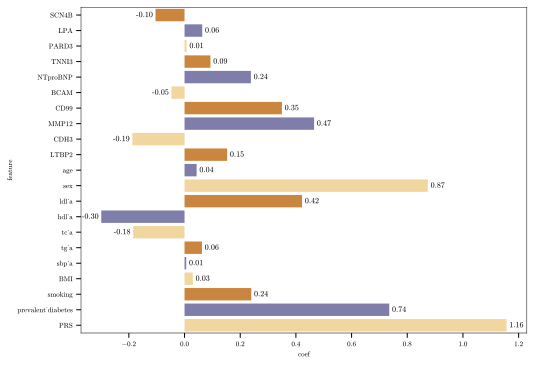

In [40]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    data=feature_map, x="coef", y=feature_map.index, ax=ax, palette=color_pallete
)

combination_dict_dir
texts = [
    ax.text(
        patch.get_width() + 0.01 if patch.get_width() > 0 else patch.get_width() - 0.07,
        patch.get_y() + patch.get_height() / 2,
        f"{patch.get_width():.2f}",
        ha="left",
        va="center",
        fontsize=8,
    )
    for patch in ax.patches
]
# adjust_text(texts)

## 模型使用参数相关性可视化

In [16]:
features_corr = pd.concat(
    [model_obj[target]["train_data"], model_obj[target]["test_data"]]
)[combination_dict[target]['features']].corr()
features_corr

,SCN4B,LPA,PARD3,TNNI3,NTproBNP,BCAM,CD99,MMP12,CDH3,LTBP2,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,PRS
SCN4B,1.000000,0.026568,0.018674,0.046239,0.055126,0.144381,0.334147,0.143693,0.306241,0.139514,0.090256,0.185600,0.035773,-0.139426,-0.001596,0.122012,0.049566,0.123977,0.051452,0.028776,-0.009365
LPA,0.026568,1.000000,0.009587,0.011329,0.001339,-0.017082,-0.004670,0.044238,0.001562,0.013914,0.020928,-0.023104,0.094440,-0.014295,0.077970,0.020643,-0.002032,0.021129,-0.007312,0.010011,0.052909
PARD3,0.018674,0.009587,1.000000,0.007056,-0.017244,0.008534,0.098925,0.021122,0.001996,-0.003431,-0.004408,0.008451,0.045502,-0.043355,0.040654,0.073977,0.008710,0.020456,-0.010422,0.000759,0.004841
TNNI3,0.046239,0.011329,0.007056,1.000000,0.043184,0.058119,0.113578,0.037695,0.028450,0.058239,0.049387,0.103594,0.011950,-0.046754,-0.000921,0.057196,0.078577,0.035878,-0.005781,0.019479,0.006357
NTproBNP,0.055126,0.001339,-0.017244,0.043184,1.000000,0.199892,0.100759,0.181900,0.113645,0.416095,0.329458,-0.193880,-0.058233,0.128825,-0.032539,-0.096946,0.079392,-0.036186,-0.000501,0.028269,-0.004267
BCAM,0.144381,-0.017082,0.008534,0.058119,0.199892,1.000000,0.321433,0.173288,0.212241,0.429562,0.179911,0.001290,0.009776,-0.007255,0.001566,0.014861,0.091451,0.028334,-0.003130,0.058670,-0.005739
CD99,0.334147,-0.004670,0.098925,0.113578,0.100759,0.321433,1.000000,0.202828,0.316439,0.228733,0.210888,0.454742,0.072174,-0.087556,0.046358,0.137046,0.205083,0.157260,0.051903,0.061669,-0.007497
MMP12,0.143693,0.044238,0.021122,0.037695,0.181900,0.173288,0.202828,1.000000,0.125331,0.319721,0.369502,0.039217,0.119546,-0.114000,0.076047,0.140739,0.141305,0.057016,0.209930,0.107403,0.034139
CDH3,0.306241,0.001562,0.001996,0.028450,0.113645,0.212241,0.316439,0.125331,1.000000,0.165961,-0.051051,0.084662,-0.057525,-0.126135,-0.091577,0.045370,-0.024262,0.025493,-0.024063,-0.001031,-0.016176
LTBP2,0.139514,0.013914,-0.003431,0.058239,0.416095,0.429562,0.228733,0.319721,0.165961,1.000000,0.514039,-0.104960,0.059181,0.152245,0.085867,-0.069321,0.166301,-0.098252,-0.037386,0.035242,-0.031376


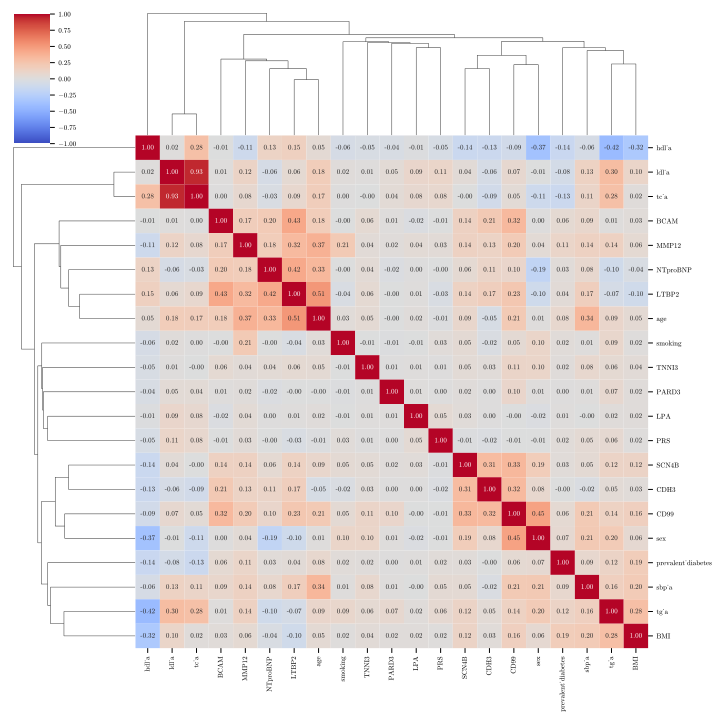

In [20]:
sns.clustermap(
    features_corr,
    figsize=(10, 10),
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
)